In [1]:
# TABLE OF CONTENT

# 1. Introduction

# 2. Problem statement

# 3. Installing and Importing Libraries

# 4. Data Acquisition

# 5. Point of Observation

# 6. Data Pre-Profiling
                      
# 7. Data pre processing
                       1.Handling missing data.
                       2.Handling redundant data.
                       3.Handling Inconsistent data.
                       4.Handling Outliers.
                       5.Handling typos.
                    
                    
# 8. Data post-Profiling

# 9. EDA(Exploratory Data Analysis)

# 10. Summary and Conclusion


IndentationError: unexpected indent (1894162571.py, line 16)

In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install scipy
!pip install datascience
!pip install pandas-profiling


# Introduction.

 **Premier League Evolution

**Premier League, also called Premiership, English professional football (soccer) league established in 1992.


**League comprises of 20 clubs and each club plays one home and one away match with every other team in the league.


**In present senerio, most win recorded by Manchestr United (13 times), although still all time favourite is Manchester City        as per data published.


# Problem Statement.


**The Premier League is the most-watched sports league in the world.

**It is broadcasted in 212 territories to 643 million homes and a potential TV audience of 4.7 billion people.

**To enchance the capabilities of players, company may need concrete and precise analysis over the past plays.

**We try to find the trending pattern of evolution of league.

**How even teams have been evoluted over the time along with the league ?

# Importing Libraries.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import scipy as sp
import requests
%matplotlib inline
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------

C:\Users\Ram Tripathi\AppData\Local\Temp\ipykernel_264432\2945103967.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


# Data Acquisition.


In [3]:
data = pd.read_csv('raw_githubusercontent_com_insaid2018_Term_1_master_Data_Projects')
data.head(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,E0,14/08/93,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,1993-94
1,E0,14/08/93,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94
2,E0,14/08/93,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94
4,E0,14/08/93,Man City,Leeds,1,1,D,NaN,NaN,NaN,1993-94
5,E0,14/08/93,Newcastle,Tottenham,0,1,A,NaN,NaN,NaN,1993-94
6,E0,14/08/93,Oldham,Ipswich,0,3,A,NaN,NaN,NaN,1993-94
7,E0,14/08/93,Sheffield United,Swindon,3,1,H,NaN,NaN,NaN,1993-94
8,E0,14/08/93,Southampton,Everton,0,2,A,NaN,NaN,NaN,1993-94
9,E0,14/08/93,West Ham,Wimbledon,0,2,A,NaN,NaN,NaN,1993-94


**|Div| - The division the match was played in.|
**|Date| - The date the match was played.| 
**|HomeTeam| - The name of the home team.| 
**|AwayTeam| - The name of the away team.|
**|FTHG| - The total number of goals scored by the home team during the match at full time.|
**| FTAG| - The total number of goals scored by the away team during the match at full time.|
**|FTR| - The full time result ('H' for home team win, 'A' for away team win, or 'D' for draw).|
**|HTHG| - The total number of goals scored by the home team at half time.|
**|HTAG| - The total number of goals scored by the away team at half time.|
**|HTR| - The half time result ('H' for home team advantage, 'A' for away team advantage, or 'D' for draw).|
**|Season| - The season in which the match was played.|

In [4]:
print("shape of data:", data.shape)

shape of data: (9664, 11)


In [5]:
data.describe()


,FTHG,FTAG,HTHG,HTAG
count,9664.00000,9664.00000,8740.00000,8740.00000
mean,1.52390,1.12148,0.68547,0.48844
std,1.30167,1.12167,0.83358,0.71052
min,0.00000,0.00000,0.00000,0.00000
25%,1.00000,0.00000,0.00000,0.00000
50%,1.00000,1.00000,0.00000,0.00000
75%,2.00000,2.00000,1.00000,1.00000
max,9.00000,8.00000,5.00000,5.00000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       9664 non-null   object 
 1   Date      9664 non-null   object 
 2   HomeTeam  9664 non-null   object 
 3   AwayTeam  9664 non-null   object 
 4   FTHG      9664 non-null   int64  
 5   FTAG      9664 non-null   int64  
 6   FTR       9664 non-null   object 
 7   HTHG      8740 non-null   float64
 8   HTAG      8740 non-null   float64
 9   HTR       8740 non-null   object 
 10  Season    9664 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 830.6+ KB


In [7]:
#To check total null value

null_value = data.isna().sum()
null_value

Div           0
Date          0
HomeTeam      0
AwayTeam      0
FTHG          0
FTAG          0
FTR           0
HTHG        924
HTAG        924
HTR         924
Season        0
dtype: int64

In [8]:
#Unique Result

print(data['FTR'].unique())
print(data['HTR'].unique())

#H - home team winner
#A - away team winner
#D - Draw

['A' 'H' 'D']
[nan 'H' 'D' 'A']


In [9]:
print(data['FTR'].value_counts())
print(data['HTR'].value_counts())

H    4461
A    2657
D    2546
Name: FTR, dtype: int64
D    3679
H    3086
A    1975
Name: HTR, dtype: int64


In [10]:
data.columns


Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Season'],
      dtype='object')

# **Observations.


**English Premier League is the top level of the English football league system.

**It is contested by 20 clubs, it operates on a system of promotion and relegation with the English Football League.

**They have accumulated the data of all the matches that has happened betweeen 1993-2018 inclusively.

**Most of missing values of goals and result belongs to the game that had played for half time.

**Most of the goal scored by home team and away team is in their second half.(will add in conclusion)

**The division the match was played in is constant though out the jounrey.

# Pre_profiling

In [11]:


profile = ProfileReport(df = data, minimal = True)
profile.to_notebook_iframe()
print('Accomplished!')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


# Data Pre-Processing.




In [12]:
Clean_data = data.copy()

# Handling of missing data.

**Missing value can be replace with min() i.e 0 , because equal no of value is 
   missing in both column (HTHG,HTAG) and declare Draw(D) in result.
   
   

In [13]:
Clean_data['HTHG'] = Clean_data['HTHG'].fillna(value = Clean_data['HTHG'].min())
Clean_data['HTAG'] = Clean_data['HTAG'].fillna(value = Clean_data['HTAG'].min())
Clean_data['HTR'] = Clean_data['HTR'].fillna(value = 'D')


In [14]:
Clean_data.describe()

,FTHG,FTAG,HTHG,HTAG
count,9664.00000,9664.00000,9664.00000,9664.00000
mean,1.52390,1.12148,0.61993,0.44174
std,1.30167,1.12167,0.81795,0.69080
min,0.00000,0.00000,0.00000,0.00000
25%,1.00000,0.00000,0.00000,0.00000
50%,1.00000,1.00000,0.00000,0.00000
75%,2.00000,2.00000,1.00000,1.00000
max,9.00000,8.00000,5.00000,5.00000


In [15]:
#Above can see all values are set now.

# Handling redundant data.

**No Duplicate, No redundant data found.


In [16]:
Clean_data.duplicated().any()

False

# Handling inconsistent data.


In [17]:
#convert date column to date time data type

Clean_data['Date'] = pd.to_datetime(data['Date'])


C:\Users\Ram Tripathi\AppData\Local\Temp\ipykernel_264432\605025442.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Clean_data['Date'] = pd.to_datetime(data['Date'])


In [18]:
#Convert column (HTHG, HTAG) from float to int() , because goal should be an integer.

Clean_data = Clean_data.astype({"HTHG" : 'int', "HTAG" : 'int'})


# Handling Outliers.

**Mean of all integer column (Goal scored) is approx similar which indicates not outlier present in data set.

**Gone through numerical values of Goal scored , all are lie between 1 to 9 ,which is possible.

# Handlings Typos.

In [19]:
for x in Clean_data.columns:
        print(Clean_data[x].unique())
        print('\n')

['E0']


['1993-08-14T00:00:00.000000000' '1993-08-15T00:00:00.000000000'
 '1993-08-16T00:00:00.000000000' ... '2018-09-05T00:00:00.000000000'
 '2018-10-05T00:00:00.000000000' '2018-05-13T00:00:00.000000000']


['Arsenal' 'Aston Villa' 'Chelsea' 'Liverpool' 'Man City' 'Newcastle'
 'Oldham' 'Sheffield United' 'Southampton' 'West Ham' 'Norwich'
 'Tottenham' 'Everton' 'Ipswich' 'Leeds' 'Wimbledon' 'Blackburn'
 'Coventry' 'Man United' 'QPR' 'Sheffield Weds' 'Swindon' 'Crystal Palace'
 'Leicester' "Nott'm Forest" 'Bolton' 'Middlesbrough' 'Derby' 'Sunderland'
 'Barnsley' 'Charlton' 'Watford' 'Bradford' 'Fulham' 'Birmingham'
 'Middlesboro' 'West Brom' 'Portsmouth' 'Wolves' 'Wigan' 'Reading' 'Hull'
 'Stoke' 'Burnley' 'Blackpool' 'Swansea' 'Cardiff' 'Bournemouth'
 'Brighton' 'Huddersfield']


['Coventry' 'QPR' 'Blackburn' 'Sheffield Weds' 'Leeds' 'Tottenham'
 'Ipswich' 'Swindon' 'Everton' 'Wimbledon' 'Man United' 'Arsenal'
 'Man City' 'Southampton' 'West Ham' 'Chelsea' 'Norwich' 'Newcastle'
 'S

#  Post - Profiling

In [20]:
Post_Profile_Report = ProfileReport(df = Clean_data, minimal = True)
Post_Profile_Report.to_notebook_iframe()
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


In [21]:
#Small Recap of cleaned data.

Clean_data.describe()


,FTHG,FTAG,HTHG,HTAG
count,9664.00000,9664.00000,9664.00000,9664.00000
mean,1.52390,1.12148,0.61993,0.44174
std,1.30167,1.12167,0.81795,0.69080
min,0.00000,0.00000,0.00000,0.00000
25%,1.00000,0.00000,0.00000,0.00000
50%,1.00000,1.00000,0.00000,0.00000
75%,2.00000,2.00000,1.00000,1.00000
max,9.00000,8.00000,5.00000,5.00000


In [22]:
Clean_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Div       9664 non-null   object        
 1   Date      9664 non-null   datetime64[ns]
 2   HomeTeam  9664 non-null   object        
 3   AwayTeam  9664 non-null   object        
 4   FTHG      9664 non-null   int64         
 5   FTAG      9664 non-null   int64         
 6   FTR       9664 non-null   object        
 7   HTHG      9664 non-null   int32         
 8   HTAG      9664 non-null   int32         
 9   HTR       9664 non-null   object        
 10  Season    9664 non-null   object        
dtypes: datetime64[ns](1), int32(2), int64(2), object(6)
memory usage: 755.1+ KB


In [23]:

#EDA(Exploratory Data Analysis)


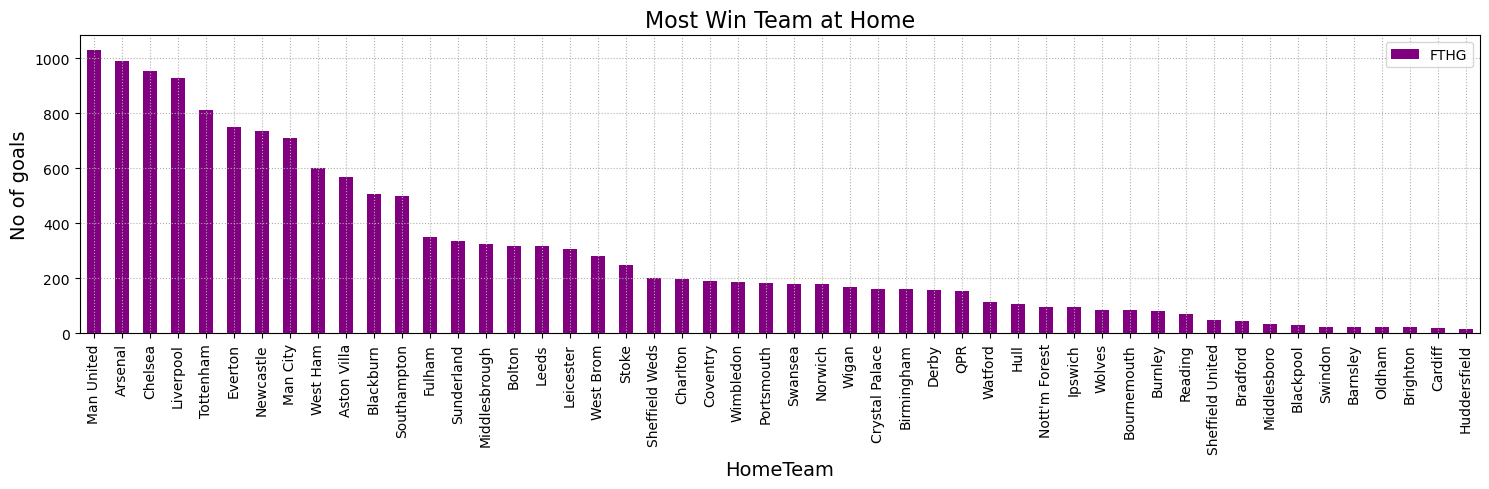

In [24]:
figure, ax = plt.subplots(figsize=[15, 5])

Most_home_win = Clean_data.groupby("HomeTeam").agg({'FTHG': 'sum'}).sort_values(by='FTHG', ascending=False)

Most_home_win.plot(kind = 'bar', color='purple', ax=ax)

plt.xticks(rotation=90, size=10)

plt.xlabel('HomeTeam', size=14)

plt.ylabel('No of goals', size=14)

plt.title('Most Win Team at Home', size=16)


plt.grid(linestyle=':')

plt.tight_layout()

plt.savefig("Most Win at Home")

#Top Teams Highest win at home(Best performer of the session, consistent performer)

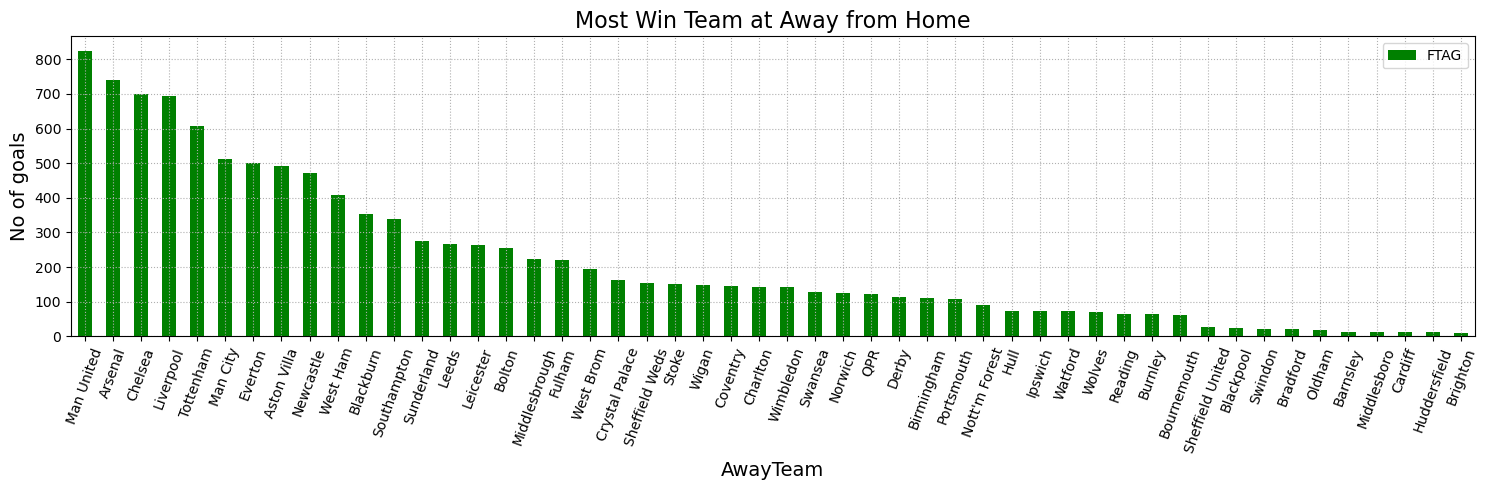

In [25]:
figure, ax = plt.subplots(figsize=[15, 5])

Most_home_win = Clean_data.groupby("AwayTeam").agg({'FTAG': 'sum'}).sort_values(by='FTAG', ascending=False)
Most_home_win.plot(kind = 'bar', color='green', ax=ax)

plt.xticks(rotation=70, size=10)

plt.xlabel('AwayTeam', size=14)

plt.ylabel('No of goals', size=14)

plt.title('Most Win Team at Away from Home', size=16)

plt.grid(linestyle=':')

plt.tight_layout()

plt.savefig("Most Win a Away from Home")

#Top Teams Highest win at away(Best performer of the session, consistent performer)

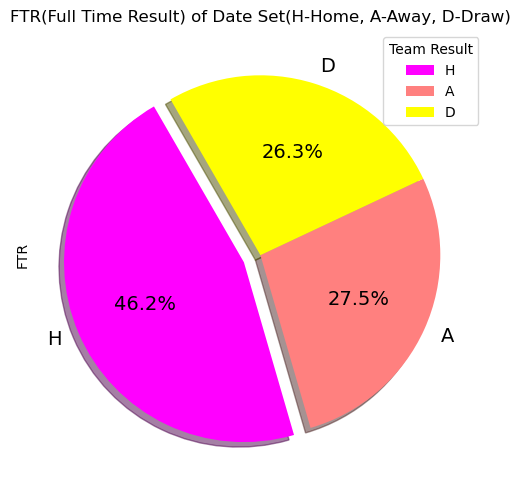

In [26]:
figure, ax = plt.subplots(figsize=[5, 5])

Clean_data['FTR'].value_counts().plot(kind='pie', fontsize=14, 
                                       autopct='%3.1f%%',
                                       shadow=True, startangle=120, cmap='spring', legend=True, explode=[0.1,0,0], ax=ax)
plt.title(label='FTR(Full Time Result) of Date Set(H-Home, A-Away, D-Draw)')

plt.legend(title = 'Team Result')

plt.tight_layout()

plt.savefig("FTR(Full Time Result) of Date Set(H-Home, A-Away, D-Draw)")


# H - Home_team_win
# A - Away_team_win
# D - Draw

#below plot show most winning by teams at home and away.

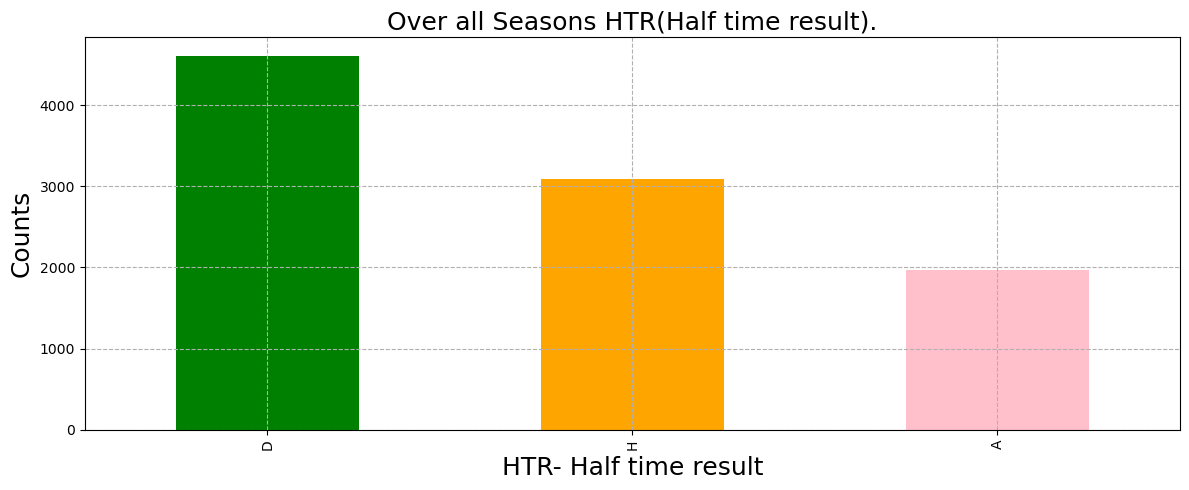

In [27]:
#Half time result for over all season.

figure = plt.figure(figsize=[12, 5])

Clean_data['HTR'].value_counts().plot(kind='bar', color=['green', 'orange', 'pink'])

plt.xlabel('HTR- Half time result', size=18)

plt.ylabel('Counts', size=18)

plt.title('Over all Seasons HTR(Half time result).', size=18)

plt.grid(linestyle='--')

plt.tight_layout()

plt.savefig("Over all Matchs HTR(Half time result")


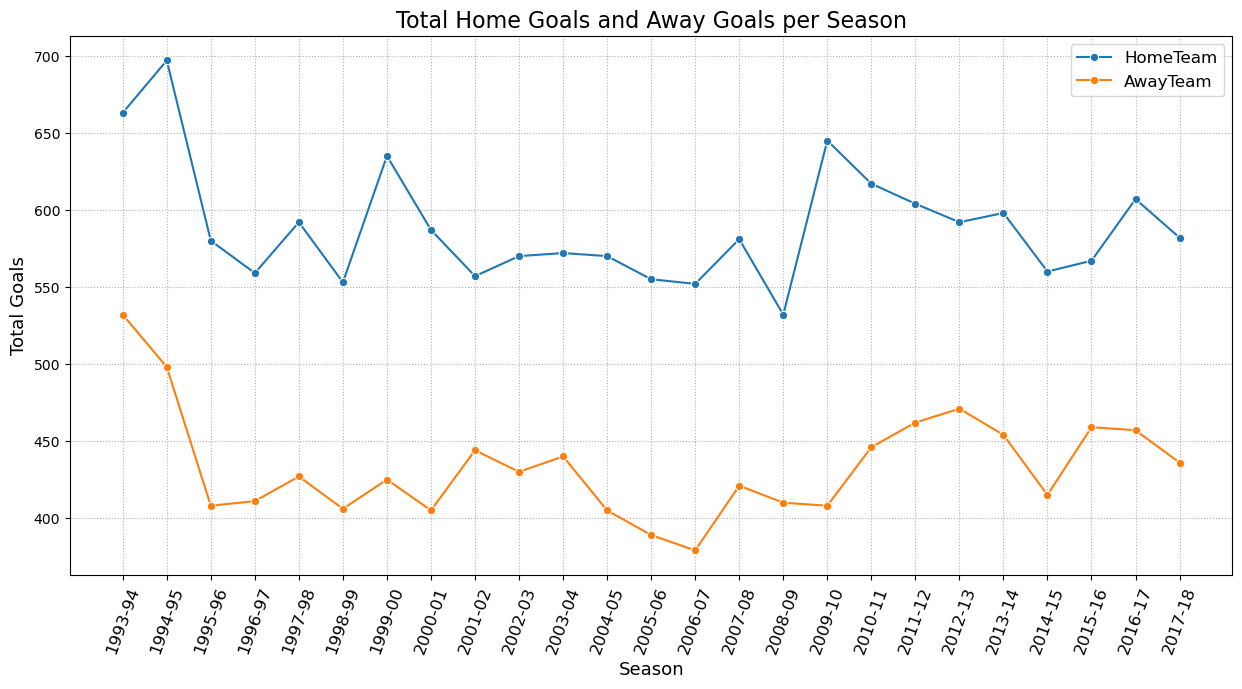

<Figure size 640x480 with 0 Axes>

In [28]:
#Home and away goal per season

figure, ax = plt.subplots(figsize=[15, 7])


Total_goals = Clean_data.groupby(by='Season')[['FTHG', 'FTAG']].sum()

sns.lineplot(data=Total_goals, x='Season', y='FTHG', ax=ax, label='HomeTeam', marker='o')
sns.lineplot(data=Total_goals, x='Season', y='FTAG', ax=ax, label='AwayTeam', marker='o')


#Clean_data.groupby(by='Season')['FTAG'].sum().plot.line(color='red', label='Away Goals', ax=ax)
#Clean_data.groupby('Season').agg({'FTHG':'sum', 'FTAG':'sum'}).nlargest(10, ['FTHG','FTAG']).plot(kind='bar',stacked=True, ax=ax1)


plt.xticks(rotation = 70, size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel('Season', fontsize=13)

# Labelling y-axis with a custom label and size of 14
plt.ylabel('Total Goals', fontsize=13)

# Labelling title with a custom label and size of 16
plt.title('Total Home Goals and Away Goals per Season', fontsize=16)

# Adding a legend to the plot
plt.legend(fontsize=12)

# Enabling the grid for better precision view
plt.grid(linestyle=':')

plt.show()

plt.tight_layout()

plt.savefig('Total Home Goals and Away Goals per Season')


#Below line plot shows goal scored by teams is reducing with the time as competetion increases(Team Evolution).

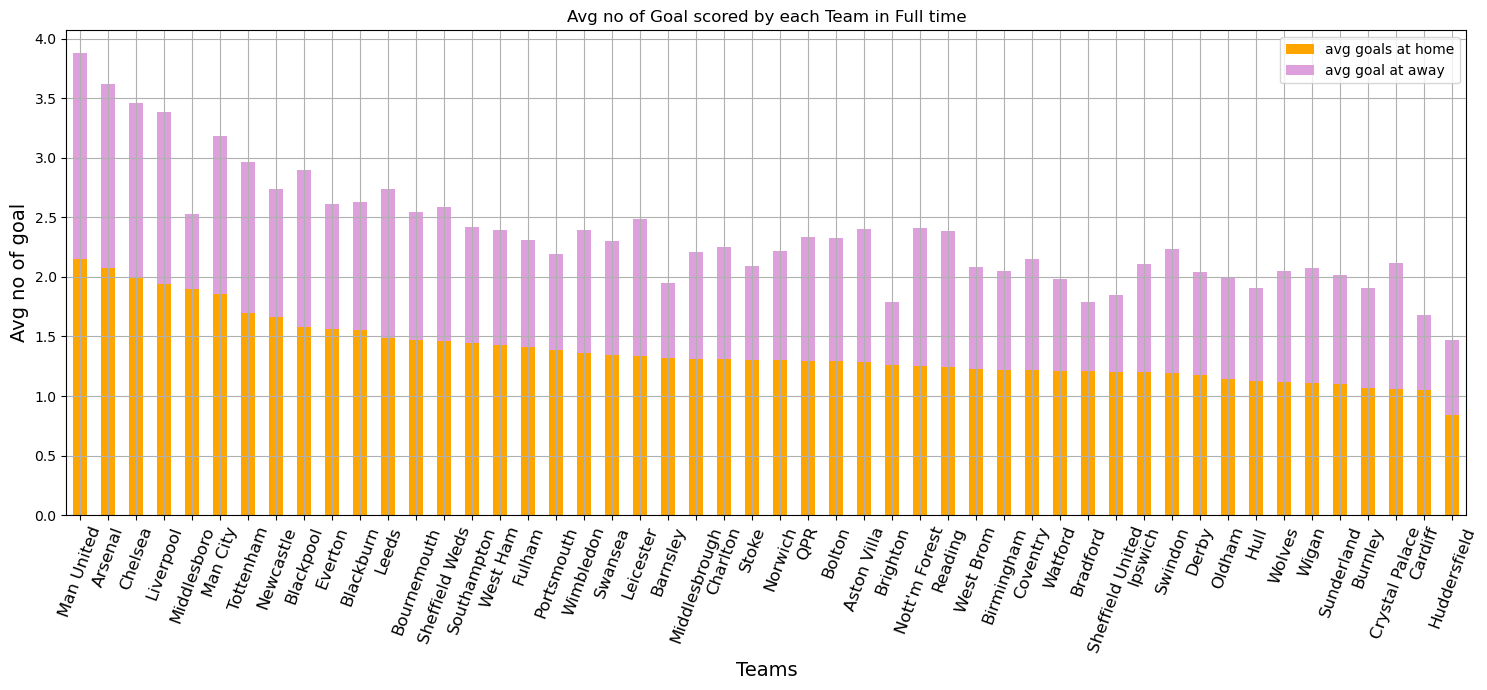

In [29]:
#Avg goal comparision for both teams.


figure, ax = plt.subplots(figsize=[15, 7])


avg_home_goals = Clean_data.groupby("HomeTeam")["FTHG"].mean()

avg_away_goals = Clean_data.groupby("AwayTeam")["FTAG"].mean()

avg_team_goal = pd.DataFrame({'avg goals at home':avg_home_goals, 'avg goal at away':avg_away_goals}).sort_values(by='avg goals at home', ascending=False)

avg_team_goal.plot(kind='bar', color=['orange', 'plum'], stacked=True, ax=ax)

plt.xticks(rotation=70, size=12)

plt.xlabel('Teams', size=14)

plt.ylabel('Avg no of goal', size=14)

plt.title("Avg no of Goal scored by each Team in Full time")

plt.grid(linestyle="-")

plt.tight_layout()

plt.savefig('Avg no of Goal scored by each Team in Full time')


#Atleast each team score one goal as an avg.

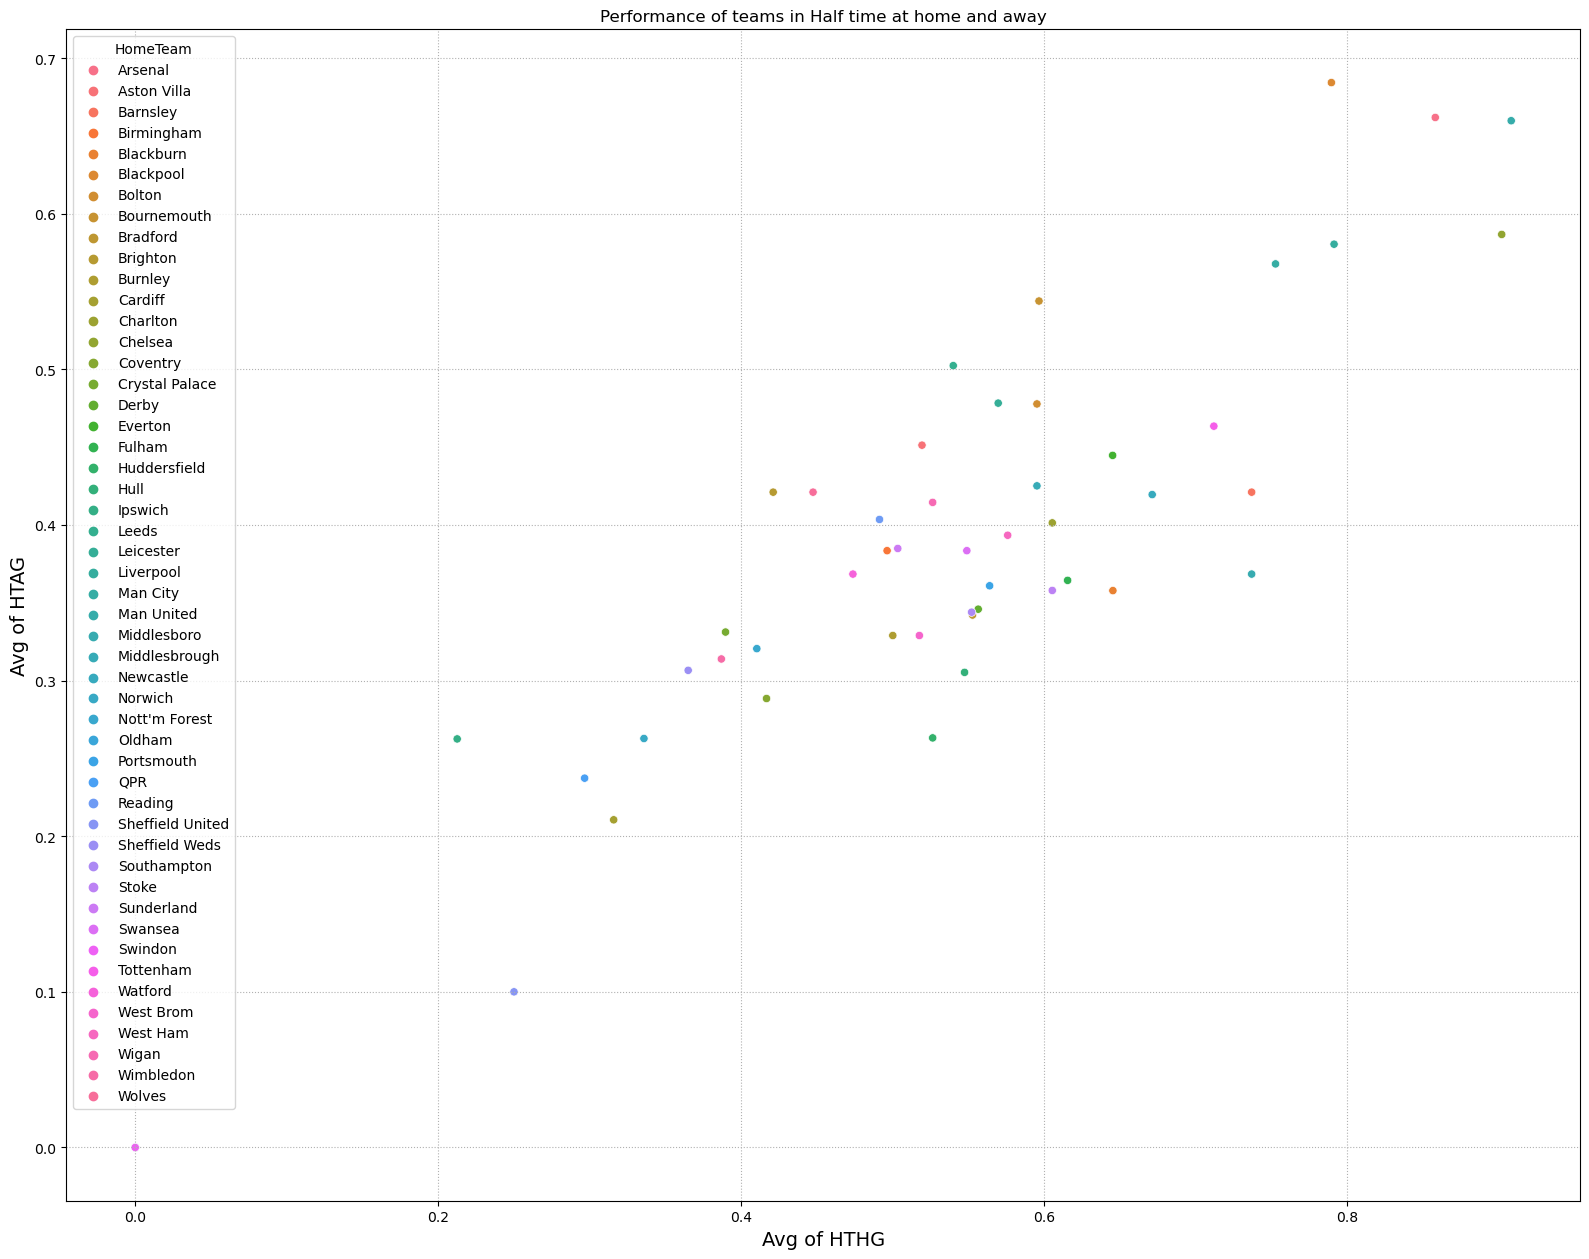

<Figure size 640x480 with 0 Axes>

In [30]:
#Both Team half time performance at home and away.

figure, ax = plt.subplots(figsize=(16,13))

half_time_home = Clean_data.groupby('HomeTeam')['HTHG'].mean()
half_time_away = Clean_data.groupby('AwayTeam')['HTAG'].mean()

avg_half_team = pd.DataFrame({'Half time at home': half_time_home, 'Half time at away': half_time_away, 'HomeTeam': half_time_home.index})

# Reset the index of the DataFrame to make 'HomeTeam' a regular column
avg_half_team.reset_index(inplace=True)

sns.scatterplot(data=avg_half_team, x='Half time at home', y='Half time at away', hue='HomeTeam', ax=ax)

plt.xlabel('Avg of HTHG', size=14)
plt.ylabel('Avg of HTAG', size=14)
plt.title('Performance of teams in Half time at home and away', size=12)
plt.grid(linestyle=':')
plt.tight_layout()

plt.show()

plt.savefig('Performance of teams in Half time at home and away')


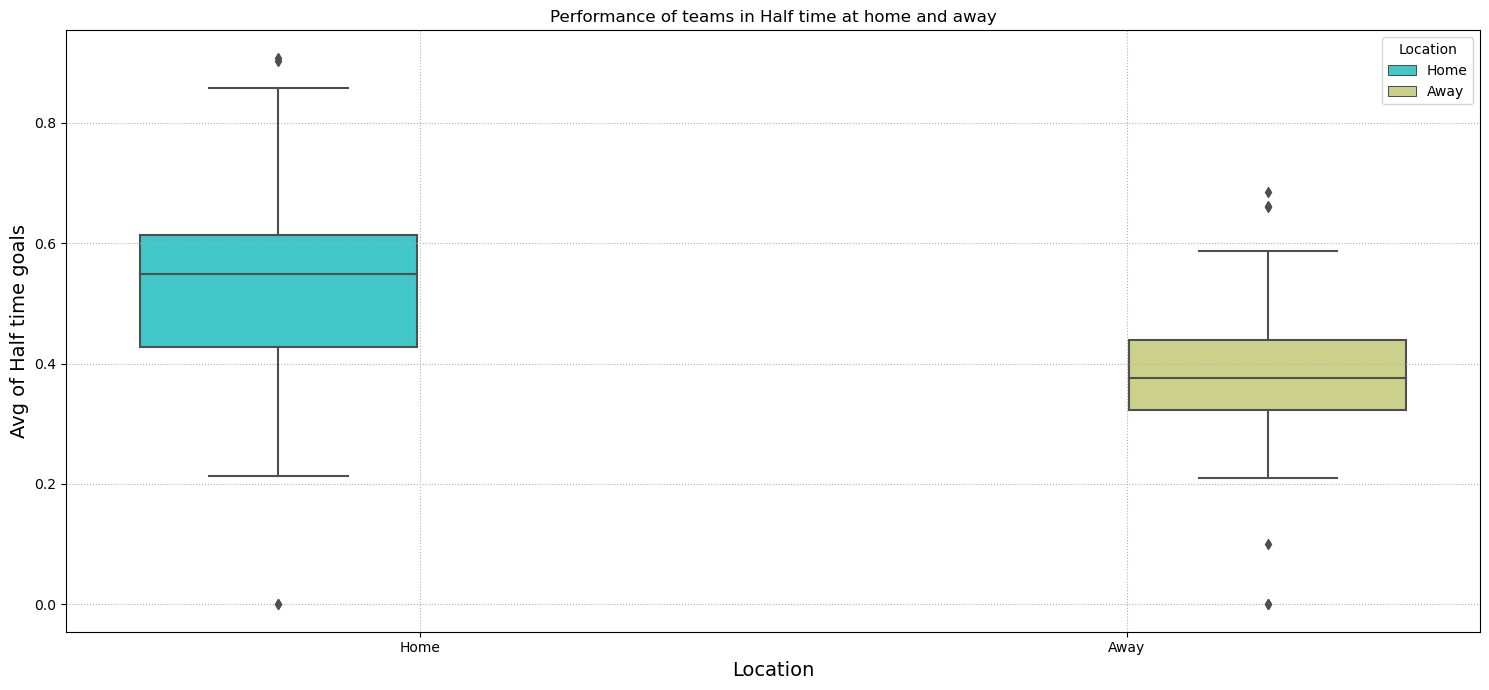

In [31]:
#Both Team half time performance at home and away(by box plot it gets more clear)

half_time_home = Clean_data.groupby('HomeTeam')['HTHG'].mean()
half_time_away = Clean_data.groupby('AwayTeam')['HTAG'].mean()

# Combine the data for both 'Half time at home' and 'Half time at away' into a single DataFrame
avg_half_team = pd.DataFrame({
    'Half time goals': pd.concat([half_time_home, half_time_away]),
    'Location': ['Home'] * len(half_time_home) + ['Away'] * len(half_time_away),
    'Team': half_time_home.index.tolist() + half_time_away.index.tolist()
})

# Plotting the boxplot with 'hue' parameter to differentiate between 'Home' and 'Away'
figure, ax = plt.subplots(figsize=[15, 7])
sns.boxplot(data=avg_half_team, x='Location', y='Half time goals', hue='Location', ax=ax, palette='rainbow')

plt.xlabel('Location', size=14)
plt.ylabel('Avg of Half time goals', size=14)
plt.title('Performance of teams in Half time at home and away', size=12)
plt.grid(linestyle=':')
plt.tight_layout()

plt.show()

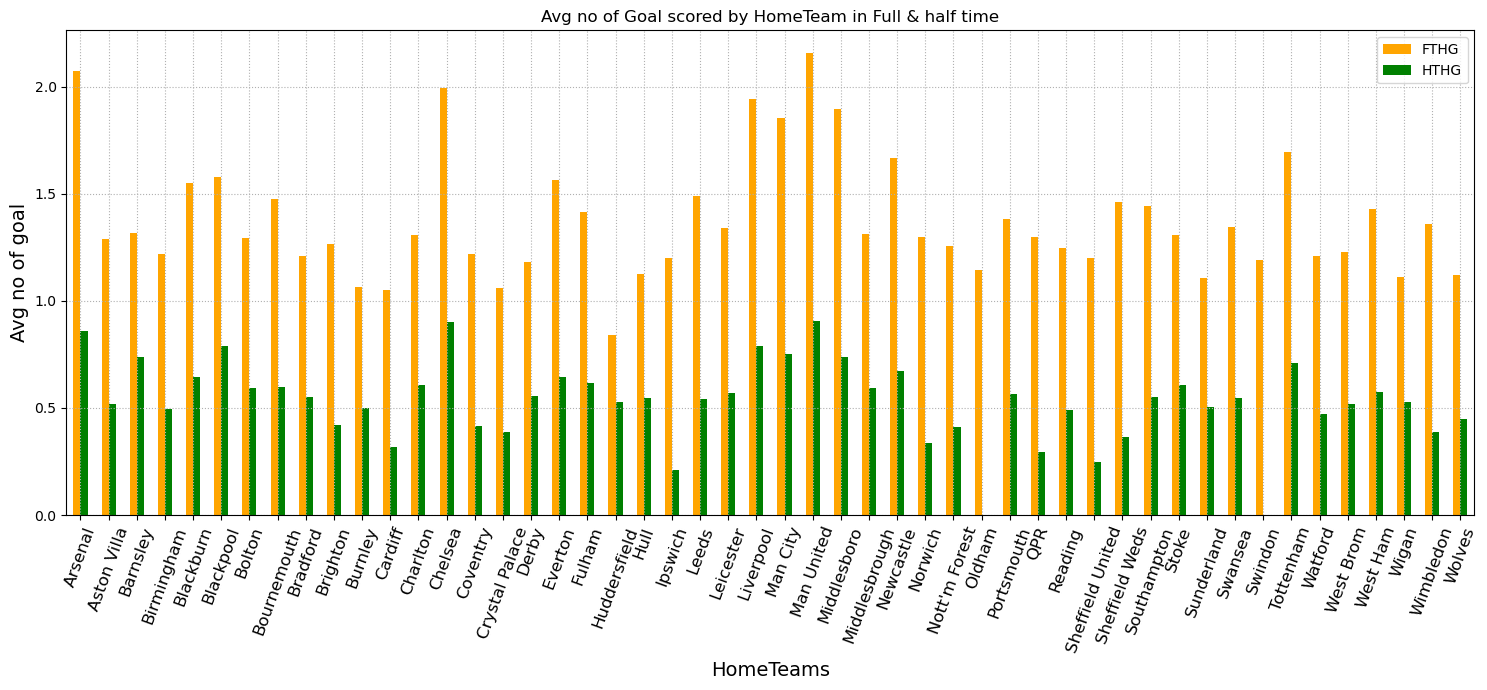

In [32]:
#Fultime home vs half time home


figure, ax = plt.subplots(figsize=[15, 7])

Clean_data.groupby("HomeTeam").agg({'FTHG':"mean", 'HTHG':'mean'}).plot(kind='bar', color=['orange', 'green'], ax=ax)

plt.xticks(rotation=70, size=12)

plt.xlabel('HomeTeams', size=14)

plt.ylabel('Avg no of goal', size=14)

plt.title("Avg no of Goal scored by HomeTeam in Full & half time")

plt.grid(linestyle=":")

plt.tight_layout()

plt.savefig('Performance of teams in Half time at home and away')



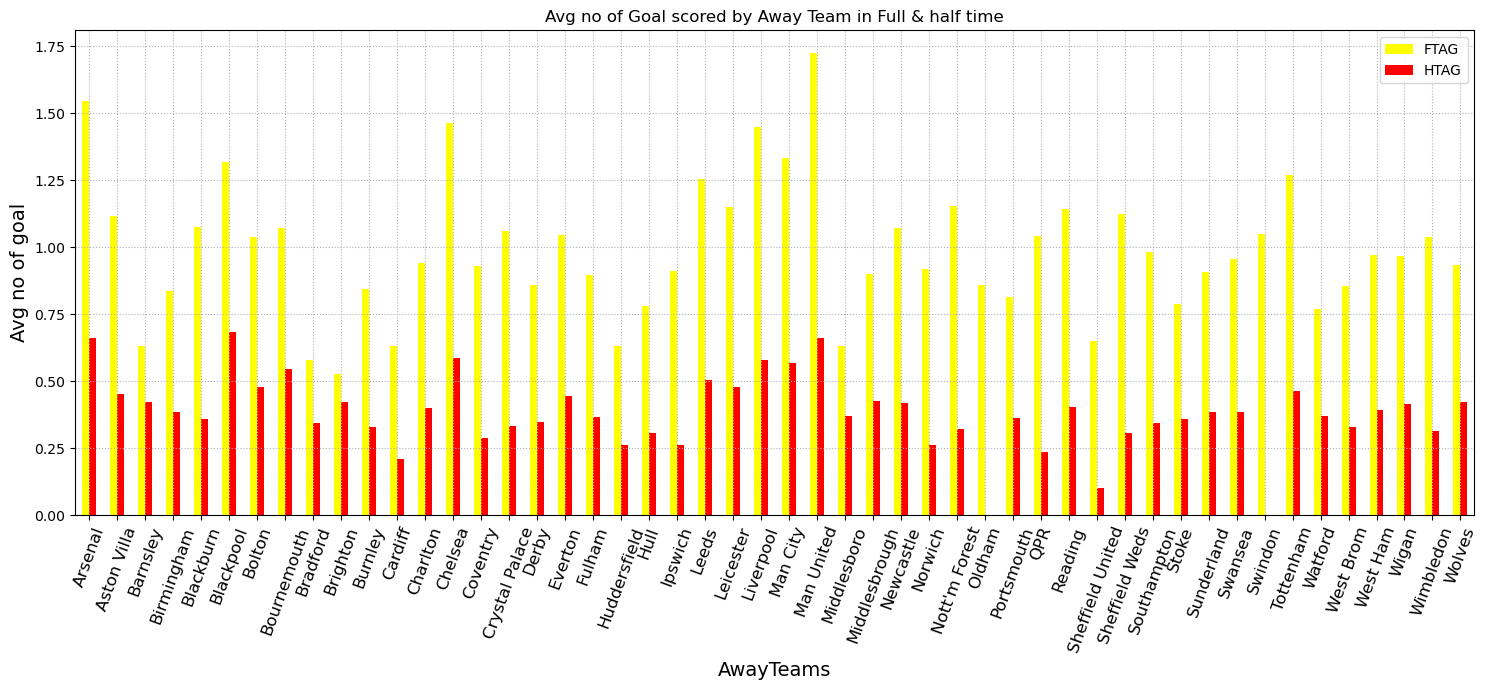

In [33]:
#full time away vs haalf time away

figure, ax = plt.subplots(figsize=[15, 7])

Clean_data.groupby("AwayTeam").agg({'FTAG':"mean", 'HTAG':'mean'}).plot(kind='bar', color=['yellow', 'red'], ax=ax)

plt.xticks(rotation=70, size=12)

plt.xlabel('AwayTeams', size=14)

plt.ylabel('Avg no of goal', size=14)

plt.title("Avg no of Goal scored by Away Team in Full & half time")

plt.grid(linestyle=":")

plt.tight_layout()

plt.savefig("Avg no of Goal scored by HomeTeam in Full & half time")
